In [11]:
import torch
import numpy as np
import pandas as pd
import os
import random
from IPython.display import Image
from scipy.special import softmax
np.set_printoptions(suppress=True)

In [12]:
numpy_data_path = "../../pokemonData/Training-baseline/"
image_data_path = "../../pokemonData/pokemonDataset/"

model = torch.load("./saved-models/test.pt")
model.eval()

metadata = pd.read_csv('metadata/pokemon.csv')

filtered_metadata = metadata.loc[:,['name', 'type1']]
filtered_metadata.type1 = pd.Categorical(filtered_metadata.type1)
filtered_metadata['code'] = filtered_metadata.type1.cat.codes
filtered_metadata = filtered_metadata[["type1", "code"]].drop_duplicates()

In [13]:
def extract_type(idx):
    return filtered_metadata[filtered_metadata["code"] == idx]["type1"].values[0]

In [14]:
def make_prediction(name):
    numpy_files = os.listdir(numpy_data_path+name)
    image_files = os.listdir(image_data_path+name)
    file_idx = random.choice(list(enumerate(numpy_files)))[0]
    display(Image(filename=image_data_path+name+"/"+image_files[file_idx], width = 500, height = 300))
    image_array = np.load(numpy_data_path+name+"/"+numpy_files[file_idx])[:,:,:3]
    data = image_array.astype(np.float32)
    
    data = data.transpose()
    data = data[None,:,:,:]
    data = torch.tensor(data, dtype=torch.float)
    prediction = model(data).detach().numpy()[0]

    confident_idx = np.argmax(prediction)
    print(f"Model predicted: {extract_type(confident_idx)}")
    prediction = [(extract_type(idx), single_prediction) for idx, single_prediction in enumerate((softmax(prediction)*100))]
    prediction.sort(key=lambda x: x[1], reverse=True)
    prediction = [f"{single_prediction[0]}: {single_prediction[1]:.2f}%" for single_prediction in prediction]
    
    for idx, single_prediction in enumerate(prediction):
        print(single_prediction, end='\t')
        if (idx + 1) % 6 == 0:
            print("")

Gewünschte Pokemon in der test_pokemon_list hinzufügen (in Englisch, mehrfach auflisten ist möglich)

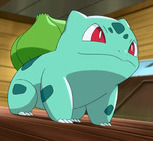

Model predicted: grass
grass: 24.88%	water: 24.06%	normal: 11.19%	dragon: 10.05%	ice: 4.99%	bug: 4.81%	
rock: 4.80%	electric: 3.06%	steel: 2.28%	psychic: 2.09%	poison: 2.03%	dark: 1.86%	
ground: 1.45%	fairy: 0.89%	fire: 0.59%	fighting: 0.48%	ghost: 0.44%	flying: 0.06%	


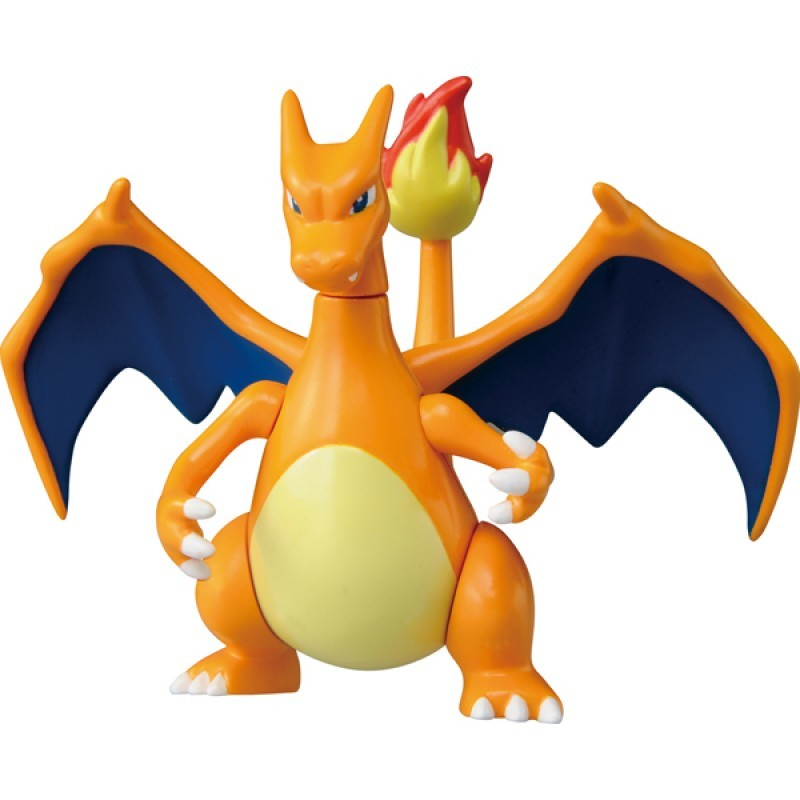

Model predicted: fire
fire: 96.39%	psychic: 1.05%	electric: 0.64%	water: 0.57%	normal: 0.53%	poison: 0.31%	
rock: 0.23%	dark: 0.12%	fairy: 0.06%	fighting: 0.03%	ground: 0.02%	dragon: 0.02%	
bug: 0.01%	ice: 0.01%	ghost: 0.00%	grass: 0.00%	steel: 0.00%	flying: 0.00%	


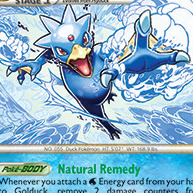

Model predicted: water
water: 40.13%	bug: 9.77%	poison: 8.00%	dragon: 7.55%	electric: 6.84%	normal: 6.81%	
ice: 4.35%	psychic: 2.89%	grass: 2.26%	steel: 2.16%	rock: 1.89%	fairy: 1.76%	
ghost: 1.55%	ground: 1.53%	fire: 1.18%	dark: 0.65%	fighting: 0.45%	flying: 0.22%	


In [15]:
test_pokemon_list = ["Bulbasaur", "Charizard", "Golduck"]
for pokemon in test_pokemon_list:
    make_prediction(pokemon)